In [1]:
!pip install geopandas
!pip install geodatasets

In [2]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

In [3]:
# Load geospatial data for US counties
#county_shapes = gpd.read_file("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json")
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

#county_shapes.head()
geoData.head()

id          GEO_ID STATE COUNTY      NAME    LSAD  CENSUSAREA  \
0  01001  0500000US01001    01    001   Autauga  County     594.436   
1  01009  0500000US01009    01    009    Blount  County     644.776   
2  01017  0500000US01017    01    017  Chambers  County     596.531   
3  01021  0500000US01021    01    021   Chilton  County     692.854   
4  01033  0500000US01033    01    033   Colbert  County     592.619   

                                            geometry  
0  POLYGON ((-86.49677 32.34444, -86.7179 32.4028...  
1  POLYGON ((-86.5778 33.76532, -86.75914 33.8406...  
2  POLYGON ((-85.18413 32.87052, -85.12342 32.772...  
3  POLYGON ((-86.51734 33.02057, -86.51596 32.929...  
4  POLYGON ((-88.13999 34.5817, -88.13925 34.5878...

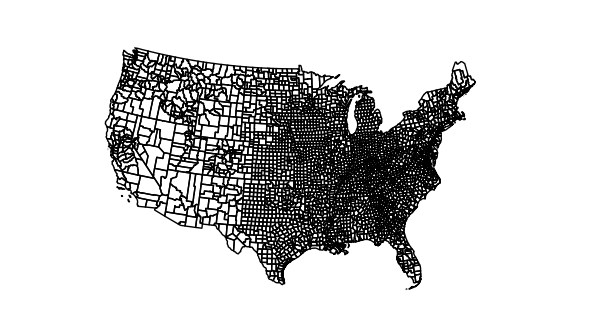

In [4]:
# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
gplt.polyplot(geoData,projection=gcrs.AlbersEqualArea(), figsize=(20, 4))
plt.show()

In [5]:
# library
import pandas as pd
import seaborn as sns

df1=pd.read_csv('sdoh_data.csv')
df2=pd.read_csv('SVI_USCounty_2020.csv')

# Drop columns with 'Unnamed' in their names
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
#print(df2.head())
#print(df1.head())

merged_df = pd.merge(df1, df2, how='left', on='FIPS')
merged_df = merged_df.drop(columns=['ST_ABBR'])
merged_df

Year                        Domain                           Measure  \
0     2020  Social and Community Context  Social Vulnerability Index (SVI)   
1     2020  Social and Community Context  Social Vulnerability Index (SVI)   
2     2020  Social and Community Context  Social Vulnerability Index (SVI)   
3     2020  Social and Community Context  Social Vulnerability Index (SVI)   
4     2020  Social and Community Context  Social Vulnerability Index (SVI)   
...    ...                           ...                               ...   
3137  2020  Social and Community Context  Social Vulnerability Index (SVI)   
3138  2020  Social and Community Context  Social Vulnerability Index (SVI)   
3139  2020  Social and Community Context  Social Vulnerability Index (SVI)   
3140  2020  Social and Community Context  Social Vulnerability Index (SVI)   
3141  2020  Social and Community Context  Social Vulnerability Index (SVI)   

       FIPS                County State   Value  \
0     10003            New Castle    DE  0.4733   
1     10005                Sussex    DE  0.4898   
2     11001  District Of Columbia    DC  0.6502   
3     12001               Alachua    FL  0.6334   
4     12003                 Baker    FL  0.4370   
...     ...                   ...   ...     ...   
3137   9007             Middlesex    CT  0.1843   
3138   9009             New Haven    CT  0.6512   
3139   9011            New London    CT  0.3959   
3140   9013               Tolland    CT  0.1073   
3141   9015               Windham    CT  0.4799   

                                        LOCATION  EPL_POV150  EPL_UNEMP  ...  \
0                    New Castle County, Delaware      0.1668     0.7151  ...   
1                        Sussex County, Delaware      0.2559     0.4742  ...   
2     District of Columbia, District of Columbia      0.3883     0.8253  ...   
3                        Alachua County, Florida      0.7651     0.5172  ...   
4                          Baker County, Florida      0.4160     0.5385  ...   
...                                          ...         ...        ...  ...   
3137               Middlesex County, Connecticut      0.0391     0.3765  ...   
3138               New Haven County, Connecticut      0.2301     0.7549  ...   
3139              New London County, Connecticut      0.1136     0.5792  ...   
3140                 Tolland County, Connecticut      0.0621     0.4955  ...   
3141                 Windham County, Connecticut      0.2263     0.8071  ...   

      EPL_MINRTY  SPL_THEME3  RPL_THEME3  EPL_MUNIT  EPL_MOBILE  EPL_CROWD  \
0         0.8256      0.8256      0.8256     0.9376      0.0773     0.2759   
1         0.6270      0.6270      0.6270     0.6585      0.6588     0.5958   
2         0.9405      0.9405      0.9405     0.9987      0.0019     0.8402   
3         0.7890      0.7890      0.7890     0.9787      0.3692     0.5344   
4         0.5656      0.5656      0.5656     0.0442      0.9831     0.5656   
...          ...         ...         ...        ...         ...        ...   
3137      0.4981      0.4981      0.4981     0.8775      0.0395     0.1111   
3138      0.7718      0.7718      0.7718     0.9322      0.0185     0.5344   
3139      0.6251      0.6251      0.6251     0.8329      0.1114     0.2377   
3140      0.4854      0.4854      0.4854     0.8100      0.0532     0.2377   
3141      0.5181      0.5181      0.5181     0.6416      0.1009     0.1680   

      EPL_NOVEH  EPL_GROUPQ  SPL_THEME4  RPL_THEME4  
0        0.6719      0.6696      2.6323      0.5710  
1        0.1604      0.2686      2.3421      0.4099  
2        0.9962      0.8364      3.6734      0.9726  
3        0.7533      0.8393      3.4749      0.9402  
4        0.0643      0.9373      2.5945      0.5506  
...         ...         ...         ...         ...  
3137     0.4102      0.7285      2.1668      0.3160  
3138     0.9488      0.7015      3.1354      0.8278  
3139     0.5942      0.7813      2.5575      0.5280  
3140     0.3412   

In [6]:
merged_df.isnull()

Year  Domain  Measure   FIPS  County  State  Value  LOCATION  \
0     False   False    False  False   False  False  False     False   
1     False   False    False  False   False  False  False     False   
2     False   False    False  False   False  False  False     False   
3     False   False    False  False   False  False  False     False   
4     False   False    False  False   False  False  False     False   
...     ...     ...      ...    ...     ...    ...    ...       ...   
3137  False   False    False  False   False  False  False     False   
3138  False   False    False  False   False  False  False     False   
3139  False   False    False  False   False  False  False     False   
3140  False   False    False  False   False  False  False     False   
3141  False   False    False  False   False  False  False     False   

      EPL_POV150  EPL_UNEMP  ...  EPL_MINRTY  SPL_THEME3  RPL_THEME3  \
0          False      False  ...       False       False       False   
1          False      False  ...       False       False       False   
2          False      False  ...       False       False       False   
3          False      False  ...       False       False       False   
4          False      False  ...       False       False       False   
...          ...        ...  ...         ...         ...         ...   
3137       False      False  ...       False       False       False   
3138       False      False  ...       False       False       False   
3139       False      False  ...       False       False       False   
3140       False      False  ...       False       False       False   
3141       False      False  ...       False       False       False   

      EPL_MUNIT  EPL_MOBILE  EPL_CROWD  EPL_NOVEH  EPL_GROUPQ  SPL_THEME4  \
0         False       False      False      False       False       False   
1         False       False      False      False       False       False   
2         False       False      False      False       False       False   
3         False       False      False      False       False       False   
4         False       False      False      False       False       False   
...         ...         ...        ...        ...         ...         ...   
3137      False       False      False      False       False       False   
3138      False       False      False      False       False       False   
3139      False       False      False      False       False       False   
3140      False       False      False      False       False       False   
3141      False       False      False      False       False       False   

      RPL_THEME4  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
3137       False  
3138       False  
3139       False  
3140       False  
3141       False  

[3142 rows x 32 columns]

In [7]:
# Extracting only 'Value' and columns that start with 'EPL_'
epl_columns = [col for col in merged_df.columns if col.startswith('EPL_')]
epl_df = merged_df[['Value'] + epl_columns]

# Display the new DataFrame
epl_df

Value  EPL_POV150  EPL_UNEMP  EPL_HBURD  EPL_NOHSDP  EPL_UNINSUR  \
0     0.4733      0.1668     0.7151     0.7750      0.2447       0.1741   
1     0.4898      0.2559     0.4742     0.7839      0.4860       0.3138   
2     0.6502      0.3883     0.8253     0.8300      0.2619       0.0506   
3     0.6334      0.7651     0.5172     0.9761      0.1840       0.4822   
4     0.4370      0.4160     0.5385     0.1337      0.7183       0.7027   
...      ...         ...        ...        ...         ...          ...   
3137  0.1843      0.0391     0.3765     0.7941      0.0611       0.0290   
3138  0.6512      0.2301     0.7549     0.9599      0.3845       0.1496   
3139  0.3959      0.1136     0.5792     0.8453      0.1840       0.0869   
3140  0.1073      0.0621     0.4955     0.7183      0.0570       0.0105   
3141  0.4799      0.2263     0.8071     0.8943      0.4768       0.0719   

      EPL_AGE65  EPL_AGE17  EPL_DISABL  EPL_SNGPNT  EPL_LIMENG  EPL_MINRTY  \
0        0.2046     0.4077      0.1868      0.7015      0.7623      0.8256   
1        0.9504     0.1343      0.3520      0.3660      0.8046      0.6270   
2        0.0503     0.1025      0.1404      0.7161      0.8148      0.9405   
3        0.1292     0.1025      0.1264      0.4714      0.6814      0.7890   
4        0.1334     0.6639      0.5493      0.3660      0.1604      0.5656   
...         ...        ...         ...         ...         ...         ...   
3137     0.6419     0.0894      0.1149      0.4134      0.6814      0.4981   
3138     0.3447     0.2645      0.1474      0.7813      0.8832      0.7718   
3139     0.4456     0.2046      0.2081      0.6537      0.8046      0.6251   
3140     0.2190     0.0738      0.0652      0.1738      0.5150      0.4854   
3141     0.2788     0.2279      0.3520      0.8020      0.8046      0.5181   

      EPL_MUNIT  EPL_MOBILE  EPL_CROWD  EPL_NOVEH  EPL_GROUPQ  
0        0.9376      0.0773     0.2759     0.6719      0.6696  
1        0.6585      0.6588     0.5958     0.1604      0.2686  
2        0.9987      0.0019     0.8402     0.9962      0.8364  
3        0.9787      0.3692     0.5344     0.7533      0.8393  
4        0.0442      0.9831     0.5656     0.0643      0.9373  
...         ...         ...        ...        ...         ...  
3137     0.8775      0.0395     0.1111     0.4102      0.7285  
3138     0.9322      0.0185     0.5344     0.9488      0.7015  
3139     0.8329      0.1114     0.2377     0.5942      0.7813  
3140     0.8100      0.0532     0.2377     0.3412      0.9325  
3141     0.6416      0.1009     0.1680     0.6719      0.7877  

[3142 rows x 17 columns]

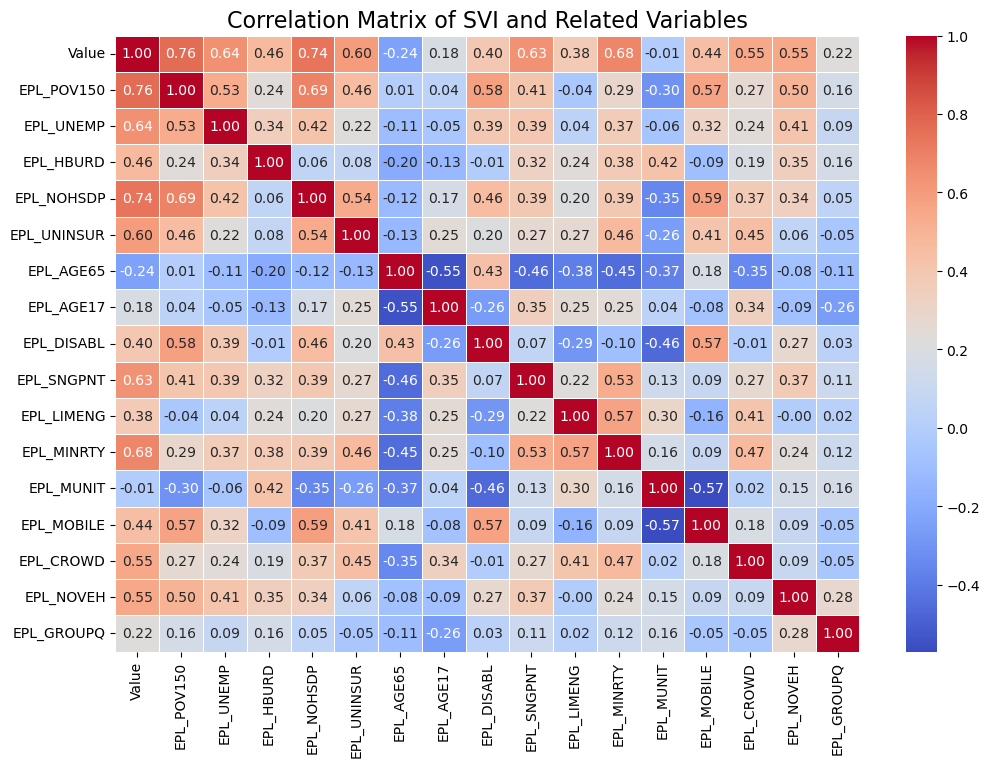

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlation matrix
correlation_matrix = epl_df.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of SVI and Related Variables', fontsize=16)
plt.show()


# Merge spatial & numeric data

In [11]:
# Merge your dataset with geospatial data
fullData = geoData.merge(merged_df, left_on="id", right_on="FIPS", how="left")
fullData

id          GEO_ID STATE COUNTY          NAME    LSAD  CENSUSAREA  \
0      1001  0500000US01001    01    001       Autauga  County     594.436   
1      1009  0500000US01009    01    009        Blount  County     644.776   
2      1017  0500000US01017    01    017      Chambers  County     596.531   
3      1021  0500000US01021    01    021       Chilton  County     692.854   
4      1033  0500000US01033    01    033       Colbert  County     592.619   
...     ...             ...   ...    ...           ...     ...         ...   
3104  51001  0500000US51001    51    001      Accomack  County     449.496   
3105  51021  0500000US51021    51    021         Bland  County     357.725   
3106  51027  0500000US51027    51    027      Buchanan  County     502.763   
3107  51037  0500000US51037    51    037     Charlotte  County     475.271   
3108  51041  0500000US51041    51    041  Chesterfield  County     423.297   

                                               geometry    Year  \
0     POLYGON ((-86.49677 32.34444, -86.7179 32.4028...  2020.0   
1     POLYGON ((-86.5778 33.76532, -86.75914 33.8406...  2020.0   
2     POLYGON ((-85.18413 32.87052, -85.12342 32.772...  2020.0   
3     POLYGON ((-86.51734 33.02057, -86.51596 32.929...  2020.0   
4     POLYGON ((-88.13999 34.5817, -88.13925 34.5878...  2020.0   
...                                                 ...     ...   
3104  MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...  2020.0   
3105  POLYGON ((-81.2251 37.23487, -81.20477 37.2430...  2020.0   
3106  POLYGON ((-81.9683 37.5378, -81.92787 37.51212...  2020.0   
3107  POLYGON ((-78.44332 37.0794, -78.49303 36.8912...  2020.0   
3108  POLYGON ((-77.8518 37.35487, -77.85515 37.4183...  2020.0   

                            Domain  ... EPL_MINRTY  SPL_THEME3 RPL_THEME3  \
0     Social and Community Context  ...     0.6337      0.6337     0.6337   
1     Social and Community Context  ...     0.4147      0.4147     0.4147   
2     Social and Community Context  ...     0.8421      0.8421     0.8421   
3     Social and Community Context  ...     0.5519      0.5519     0.5519   
4     Social and Community Context  ...     0.5770      0.5770     0.5770   
...                            ...  ...        ...         ...        ...   
3104  Social and Community Context  ...     0.7950      0.7950     0.7950   
3105  Social and Community Context  ...     0.1655      0.1655     0.1655   
3106  Social and Community Context  ...     0.1066      0.1066     0.1066   
3107  Social and Community Context  ...     0.7066      0.7066     0.7066   
3108  Social and Community Context  ...     0.7842      0.7842     0.7842   

     EPL_MUNIT  EPL_MOBILE EPL_CROWD  EPL_NOVEH  EPL_GROUPQ  SPL_THEME4  \
0       0.6050      0.7486    0.4023     0.4764      0.1569      2.3892   
1       0.1187      0.8803    0.4742     0.4281      0.1569      2.0582   
2       0.8355      0.6136    0.9688     0.7533      0.4198      3.5910   
3       0.1585      0.9583    0.7237     0.2263      0.1569      2.2237   
4       0.4246      0.4398    0.0551     0.3934      0.0977      1.4106   
...        ...         ...       ...        ...         ...         ...   
3104    0.3262      0.7597    0.5958     0.8701      0.7116      3.2634   
3105    0.2909      0.9290    0.3183     0.1604      0.9723      2.6709   
3106    0.2909      0.9612    0.0875     0.5942      0.7584      2.6922   
3107    0.2699      0.8765    0.2759     0.8749      0.2686      2.5658   
3108    0.8186      0.0487    0.4023     0.0840      0.1913      1.5449   

      RPL_THEME4  
0         0.4309  
1         0.2743  
2         0.9599  
3         0.3463  
4         0.0761  
...          ...  
3104      0.8816  
3105      0.5901  
3106      0.6009  
3107      0.5334  
3108      0.1060  

[3109 rows x 40 columns]

C:\Users\Elega\.conda\Lib\site-packages\geoplot\geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


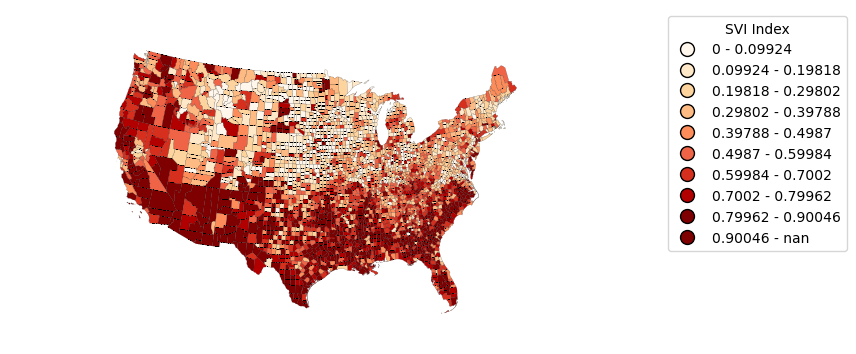

In [12]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt


# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['Value'], k=10)

# Map
gplt.choropleth(
    fullData,
    hue="Value",
    projection=gcrs.AlbersEqualArea(),
    linewidth=0.1,
    scheme=scheme,
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    legend_kwargs={
        "loc": "upper left",  # Legend location
        "bbox_to_anchor": (1.05, 1),  # Adjust this to move the legend further
        "title": "SVI Index",  # Optional: Add title to the legend
        "frameon": True  # Optional: Turn off legend frame
    }
)

plt.show()

# Choropleth map with Python and Folium

### Map initialization

In [19]:
# import the folium library
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

# Average SVI by State

In [20]:
 #Group by 'state' and calculate the mean SVI score for each state
state_avg_svi = merged_df.groupby('State')['Value'].mean().reset_index()

# Rename columns for clarity
state_avg_svi.columns = ['State', 'Avg_SVI']

# Display the result
state_avg_svi.head()

State   Avg_SVI
0    AK  0.611247
1    AL  0.674516
2    AR  0.666639
3    AZ  0.841920
4    CA  0.681726

In [21]:

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
geoData = gpd.read_file(state_geo)
geoData.head()

id        name                                           geometry
0  AL     Alabama  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  AK      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  AZ     Arizona  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  AR    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  CA  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...

### Adding District of Columbia to geoData

In [22]:
import json
import geopandas as gpd

# Read the existing GeoDataFrame
geoData = gpd.read_file(state_geo)

# DC's GeoJSON data (you can find more accurate geometry if needed)
dc_geometry = {
    "type": "Feature",
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [-77.119759, 38.934343],
                [-76.909393, 38.934343],
                [-76.909393, 38.791646],
                [-77.119759, 38.791646],
                [-77.119759, 38.934343]
            ]
        ],
    },
    "properties": {
        "name": "District of Columbia",
        "id": "DC",
    },
}

# Convert DC's GeoJSON to a GeoDataFrame
dc_gdf = gpd.GeoDataFrame.from_features([dc_geometry])

# Append DC to the original GeoDataFrame
geoData = pd.concat([geoData, dc_gdf], ignore_index=True)

# Verify DC was added
geoData.head()

C:\Users\Elega\.conda\Lib\site-packages\geopandas\array.py:1638: UserWarning:

CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).



id        name                                           geometry
0  AL     Alabama  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  AK      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  AZ     Arizona  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  AR    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  CA  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...

In [23]:
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_avg_svi,
    columns=["State", "Avg_SVI"],
    key_on="feature.id",
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="State Average SVI",
).add_to(m)

folium.LayerControl().add_to(m)
m

## State Example County and Themes

In [24]:
# Filter for Nevada counties
nevada_df = merged_df[merged_df["State"] == "NV"]

# Display the filtered DataFrame
nevada_df

Year                        Domain                           Measure  \
1430  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1431  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1432  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1433  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1434  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1435  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1436  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1437  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1438  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1439  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1440  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1441  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1442  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1443  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1444  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1445  2020  Social and Community Context  Social Vulnerability Index (SVI)   
1446  2020  Social and Community Context  Social Vulnerability Index (SVI)   

       FIPS       County State   Value                   LOCATION  EPL_POV150  \
1430  32001    Churchill    NV  0.6219   Churchill County, Nevada      0.4102   
1431  32003        Clark    NV  0.8565       Clark County, Nevada      0.4551   
1432  32005      Douglas    NV  0.2037     Douglas County, Nevada      0.0649   
1433  32007         Elko    NV  0.5751        Elko County, Nevada      0.2724   
1434  32009    Esmeralda    NV  0.8208   Esmeralda County, Nevada      0.8857   
1435  32011       Eureka    NV  0.2387      Eureka County, Nevada      0.6171   
1436  32013     Humboldt    NV  0.6079    Humboldt County, Nevada      0.4290   
1437  32015       Lander    NV  0.6999      Lander County, Nevada      0.6792   
1438  32017      Lincoln    NV  0.6623     Lincoln County, Nevada      0.0789   
1439  32019         Lyon    NV  0.5863        Lyon County, Nevada      0.3011   
1440  32021      Mineral    NV  0.7050     Mineral County, Nevada      0.9392   
1441  32023          Nye    NV  0.8176         Nye County, Nevada      0.6088   
1442  32027     Pershing    NV  0.7196    Pershing County, Nevada      0.1922   
1443  32029       Storey    NV  0.1165      Storey County, Nevada      0.0738   
1444  32031       Washoe    NV  0.6744      Washoe County, Nevada      0.2934   
1445  32033   White Pine    NV  0.2884  White Pine County, Nevada      0.3316   
1446  32510  Carson City    NV  0.8504        Carson City, Nevada      0.3762   

      EPL_UNEMP  ...  EPL_MINRTY  SPL_THEME3  RPL_THEME3  EPL_MUNIT  \
1430     0.6871  ...      0.6521      0.6521      0.6521     0.5939   
1431     0.8167  ...      0.9169      0.9169      0.9169     0.9539   
1432     0.3323  ...      0.5541      0.5541      0.5541     0.5850   
1433     0.3765  ...      0.7342      0.7342      0.7342     0.6050   
1434     0.1509  ...      0.6617      0.6617      0.6617     0.9564   
1435     0.0000  ...      0.2966      0.2966      0.2966     0.0866   
1436     0.2721  ...      0.7377      0.7377      0.7377     0.3797   
1437     0.9367  ...      0.6862      0.6862      0.6862     0.0000   
1438     0.5385  ...      0.5035      0.5035      0.5035     0.2909   
1439     0.8861  ...      0.6327      0.6327      0.6327     0.3469   
1440     0.9825  ...      0.7763      0.7763      0.7763     0.4106   
1441     0.9169  ...      0.6232      0.6232      0.6232     0.4545   
1442     0.9208  ...      0.7447      0.7447      0.7447     0.5850   
1443     0.2543  ...      0.5261      0.5261      0.5261     0.0000   
1444     0.5586  ...      0.7689      0.7689      0.7689     0.9443   
1445  

In [25]:
# Define filter criteria
state_filter = "NV"  # Filter by state (e.g., Nevada)
county_filter = nevada_df["County"]  # Filter by specific counties
themes_filter = ["SPL_THEME1", "SPL_THEME2", "SPL_THEME3", "SPL_THEME4"]  # Filter by specific SPL_THEMES

# Apply filters
filtered_df = merged_df[
    (merged_df["State"] == state_filter) & (merged_df["County"].isin(county_filter))
][["County"] + themes_filter]  # Select only the desired SPL_THEMES

# Display the filtered DataFrame
print(filtered_df)

           County  SPL_THEME1  SPL_THEME2  SPL_THEME3  SPL_THEME4
1430    Churchill      2.6053      2.9366      0.6521      2.4430
1431        Clark      3.6257      2.7345      0.9169      2.9253
1432      Douglas      1.6324      2.2969      0.5541      1.5936
1433         Elko      2.0124      2.6802      0.7342      2.9395
1434    Esmeralda      3.4869      2.6474      0.6617      3.1130
1435       Eureka      1.3606      2.1346      0.2966      2.5449
1436     Humboldt      2.5187      2.4618      0.7377      2.8371
1437       Lander      3.0462      3.3250      0.6862      2.0197
1438      Lincoln      2.6579      2.6948      0.5035      3.0099
1439         Lyon      3.1010      2.8714      0.6327      1.8243
1440      Mineral      3.6168      2.2807      0.7763      2.4297
1441          Nye      3.6297      3.0108      0.6232      2.6239
1442     Pershing      2.9615      2.1952      0.7447      3.2858
1443       Storey      1.6489      2.2231      0.5261      0.9380
1444      

In [28]:
# List of theme columns to include in the calculation
theme_columns = ['SPL_THEME1', 'SPL_THEME2', 'SPL_THEME3', 'SPL_THEME4']

# Group by 'state' and calculate the mean for each theme column
state_avg_themes = merged_df.groupby('State')[theme_columns].mean().reset_index()

# Display the result
state_avg_themes

State  SPL_THEME1  SPL_THEME2  SPL_THEME3  SPL_THEME4
0     AK    2.558487    2.130240    0.825317    3.176983
1     AL    3.130284    2.697997    0.680672    2.562328
2     AR    2.933519    2.873613    0.552955    2.679864
3     AZ    3.330680    3.038267    0.840153    3.174373
4     CA    2.902131    2.570043    0.800764    2.909200
5     CO    2.383169    2.204370    0.605675    2.248122
6     CT    1.992200    2.111250    0.608162    2.525125
7     DC    2.356100    1.824100    0.940500    3.673400
8     DE    2.194750    2.435100    0.726300    2.487200
9     FL    3.154379    2.586800    0.688122    2.912767
10    GA    3.453818    2.642276    0.728794    2.659320
11    HI    1.453060    1.968500    0.974040    2.422260
12    IA    1.275744    2.271827    0.250541    2.031872
13    ID    2.653405    2.498816    0.459057    2.120823
14    IL    1.861043    2.305434    0.326724    2.257351
15    IN    1.990274    2.338296    0.264440    2.211145
16    KS    1.845638    2.487886    0.404408    1.976571
17    KY    2.719622    2.507953    0.230762    2.611002
18    LA    3.225058    2.770300    0.755591    2.944212
19    MA    1.870200    2.126371    0.577914    2.607264
20    MD    1.921775    2.310346    0.657388    2.343267
21    ME    2.245050    2.049794    0.161713    2.476869
22    MI    2.239664    2.177582    0.332143    2.371316
23    MN    1.369863    2.242043    0.339498    2.396152
24    MO    2.688121    2.412648    0.263210    2.382264
25    MS    3.672898    2.767166    0.794543    2.835613
26    MT    1.961786    1.999982    0.337929    2.229166
27    NC    3.216289    2.712507    0.657192    2.686060
28    ND    1.237521    2.004436    0.307934    2.177643
29    NE    1.443966    2.332567    0.286178    1.766433
30    NH    1.795580    1.666910    0.222130    2.420390
31    NJ    2.344600    2.257029    0.734838    2.626952
32    NM    3.174403    3.105858    0.901239    2.831076
33    NV    2.661812    2.563006    0.658900    2.572141
34    NY    2.192969    2.144087    0.449171    2.904482
35    OH    2.025040    2.293215    0.275799    2.286485
36    OK    2.953106    2.936822    0.677501    2.490430
37    OR    2.658819    2.594992    0.524567    2.896142
38    PA    2.042555    2.207996    0.314155    2.559772
39    RI    1.780300    2.044140    0.443740    2.491540
40    SC    3.359511    2.721367    0.791909    2.958339
41    SD    1.810330    2.064635    0.409161    2.365694
42    TN    2.979913    2.550499    0.362957    2.361491
43    TX    3.083037    2.956513    0.775566    2.611894
44    UT    1.893062    2.385124    0.421017    2.011472
45    VA    2.422612    2.221611    0.594906    2.285279
46    VT    1.755179    1.817857    0.167207    2.336136
47    WA    2.405677    2.537826    0.587328    2.662797
48    WI    1.591610    2.027772    0.296374    2.158535
49    WV    2.563325    2.199200    0.147767    2.507907
50    WY    1.843009    2.018883    0.410000    2.255561

In [29]:
# Merge on the 'state' column
merged_df2 = pd.merge(state_avg_svi, state_avg_themes, on='State')

# Display the merged DataFrame
merged_df2

State   Avg_SVI  SPL_THEME1  SPL_THEME2  SPL_THEME3  SPL_THEME4
0     AK  0.611247    2.558487    2.130240    0.825317    3.176983
1     AL  0.674516    3.130284    2.697997    0.680672    2.562328
2     AR  0.666639    2.933519    2.873613    0.552955    2.679864
3     AZ  0.841920    3.330680    3.038267    0.840153    3.174373
4     CA  0.681726    2.902131    2.570043    0.800764    2.909200
5     CO  0.440884    2.383169    2.204370    0.605675    2.248122
6     CT  0.397962    1.992200    2.111250    0.608162    2.525125
7     DC  0.650200    2.356100    1.824100    0.940500    3.673400
8     DE  0.481550    2.194750    2.435100    0.726300    2.487200
9     FL  0.710745    3.154379    2.586800    0.688122    2.912767
10    GA  0.722114    3.453818    2.642276    0.728794    2.659320
11    HI  0.400700    1.453060    1.968500    0.974040    2.422260
12    IA  0.212693    1.275744    2.271827    0.250541    2.031872
13    ID  0.473611    2.653405    2.498816    0.459057    2.120823
14    IL  0.339763    1.861043    2.305434    0.326724    2.257351
15    IN  0.340324    1.990274    2.338296    0.264440    2.211145
16    KS  0.323918    1.845638    2.487886    0.404408    1.976571
17    KY  0.528367    2.719622    2.507953    0.230762    2.611002
18    LA  0.763473    3.225058    2.770300    0.755591    2.944212
19    MA  0.385214    1.870200    2.126371    0.577914    2.607264
20    MD  0.411033    1.921775    2.310346    0.657388    2.343267
21    ME  0.345094    2.245050    2.049794    0.161713    2.476869
22    MI  0.382148    2.239664    2.177582    0.332143    2.371316
23    MN  0.270429    1.369863    2.242043    0.339498    2.396152
24    MO  0.477330    2.688121    2.412648    0.263210    2.382264
25    MS  0.802701    3.672898    2.767166    0.794543    2.835613
26    MT  0.300050    1.961786    1.999982    0.337929    2.229166
27    NC  0.692436    3.216289    2.712507    0.657192    2.686060
28    ND  0.202264    1.237521    2.004436    0.307934    2.177643
29    NE  0.219199    1.443966    2.332567    0.286178    1.766433
30    NH  0.223230    1.795580    1.666910    0.222130    2.420390
31    NJ  0.507062    2.344600    2.257029    0.734838    2.626952
32    NM  0.799058    3.174403    3.105858    0.901239    2.831076
33    NV  0.590882    2.661812    2.563006    0.658900    2.572141
34    NY  0.461798    2.192969    2.144087    0.449171    2.904482
35    OH  0.351224    2.025040    2.293215    0.275799    2.286485
36    OK  0.671312    2.953106    2.936822    0.677501    2.490430
37    OR  0.610847    2.658819    2.594992    0.524567    2.896142
38    PA  0.371252    2.042555    2.207996    0.314155    2.559772
39    RI  0.318080    1.780300    2.044140    0.443740    2.491540
40    SC  0.777093    3.359511    2.721367    0.791909    2.958339
41    SD  0.324735    1.810330    2.064635    0.409161    2.365694
42    TN  0.553044    2.979913    2.550499    0.362957    2.361491
43    TX  0.713525    3.083037    2.956513    0.775566    2.611894
44    UT  0.331366    1.893062    2.385124    0.421017    2.011472
45    VA  0.447019    2.422612    2.221611    0.594906    2.285279
46    VT  0.220950    1.755179    1.817857    0.167207    2.336136
47    WA  0.535238    2.405677    2.537826    0.587328    2.662797
48    WI  0.234990    1.591610    2.027772    0.296374    2.158535
49    WV  0.418529    2.563325    2.199200    0.147767    2.507907
50    WY  0.284713    1.843009    2.018883    0.410000    2.255561

In [31]:
import pandas as pd
import plotly.graph_objects as go


# Create traces for each theme
traces = []
themes = ["Avg_SVI", "SPL_THEME1", "SPL_THEME2"]
for theme in themes:
    trace = go.Bar(
        x=merged_df2["State"],
        y=merged_df2[theme],
        name=theme,
        visible=True if theme == "Avg_SVI" else False  # Show Avg_SVI by default
    )
    traces.append(trace)

# Layout with a dropdown for multi-selection
layout = go.Layout(
    title="Interactive Bar Plot: Compare Avg_SVI and Themes by State",
    xaxis={"title": "State"},
    yaxis={"title": "Value"},
    updatemenus=[
        dict(
            type="dropdown",
            buttons=[
                dict(
                    label="Avg_SVI",
                    method="restyle",
                    args=["visible", [True, False, False]],
                ),
                dict(
                    label="SPL_THEME1",
                    method="restyle",
                    args=["visible", [False, True, False]],
                ),
                dict(
                    label="SPL_THEME2",
                    method="restyle",
                    args=["visible", [False, False, True]],
                ),
                dict(
                    label="SPL_THEME3",
                    method="restyle",
                    args=["visible", [False, False, True]],
                ),
                dict(
                    label="SPL_THEME4",
                    method="restyle",
                    args=["visible", [False, False, True]],
                ),
                dict(
                    label="Show All",
                    method="restyle",
                    args=["visible", [True, True, True]],
                ),
                dict(
                    label="Hide All",
                    method="restyle",
                    args=["visible", [False, False, False]],
                ),
            ],
            showactive=True,
        )
    ],
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()


In [45]:
pip install dash pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [46]:
import dash
from dash import dcc, html, Input, Output
import dash_table
import pandas as pd
import plotly.express as px

In [54]:
import dash
from dash import dcc, html, Input, Output
import dash_table
import pandas as pd
import plotly.express as px

# DataFrame from the input data
data = {
    "State": ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA",
              "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
              "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY"],
    "Avg_SVI": [0.611247, 0.674516, 0.666639, 0.841920, 0.681726, 0.440884, 0.397962, 0.650200, 0.481550, 0.710745, 0.722114,
                0.400700, 0.212693, 0.473611, 0.339763, 0.340324, 0.323918, 0.528367, 0.763473, 0.385214, 0.411033, 0.345094,
                0.382148, 0.270429, 0.477330, 0.802701, 0.300050, 0.692436, 0.202264, 0.219199, 0.223230, 0.507062, 0.799058,
                0.590882, 0.461798, 0.351224, 0.671312, 0.610847, 0.371252, 0.318080, 0.777093, 0.324735, 0.553044, 0.713525,
                0.331366, 0.447019, 0.220950, 0.535238, 0.234990, 0.418529, 0.284713],
    "SPL_THEME1": [2.558487, 3.130284, 2.933519, 3.330680, 2.902131, 2.383169, 1.992200, 2.356100, 2.194750, 3.154379, 3.453818,
                   1.453060, 1.275744, 2.653405, 1.861043, 1.990274, 1.845638, 2.719622, 3.225058, 1.870200, 1.921775, 2.245050,
                   2.239664, 1.369863, 2.688121, 3.672898, 1.961786, 3.216289, 1.237521, 1.443966, 1.795580, 2.344600, 3.174403,
                   2.661812, 2.192969, 2.025040, 2.953106, 2.658819, 2.042555, 1.780300, 3.359511, 1.810330, 2.979913, 3.083037,
                   1.893062, 2.422612, 1.755179, 2.405677, 1.591610, 2.563325, 1.843009],
    "SPL_THEME2": [2.130240, 2.697997, 2.873613, 3.038267, 2.570043, 2.204370, 2.111250, 1.824100, 2.435100, 2.586800, 2.642276,
                   1.968500, 2.271827, 2.498816, 2.305434, 2.338296, 2.487886, 2.507953, 2.770300, 2.126371, 2.310346, 2.049794,
                   2.177582, 2.242043, 2.412648, 2.767166, 1.999982, 2.712507, 2.004436, 2.332567, 1.666910, 2.257029, 3.105858,
                   2.563006, 2.144087, 2.293215, 2.936822, 2.594992, 2.207996, 2.044140, 2.721367, 2.064635, 2.550499, 2.956513,
                   2.385124, 2.221611, 1.817857, 2.537826, 2.027772, 2.199200, 2.018883],
    "SPL_THEME3": [0.825317, 0.680672, 0.552955, 0.840153, 0.800764, 0.605675, 0.608162, 0.940500, 0.726300, 0.688122, 0.728794,
                   0.974040, 0.250541, 0.459057, 0.326724, 0.264440, 0.404408, 0.230762, 0.755591, 0.577914, 0.657388, 0.161713,
                   0.332143, 0.339498, 0.263210, 0.794543, 0.337929, 0.657192, 0.307934, 0.286178, 0.222130, 0.734838, 0.901239,
                   0.658900, 0.449171, 0.275799, 0.677501, 0.524567, 0.314155, 0.443740, 0.791909, 0.409161, 0.362957, 0.775566,
                   0.421017, 0.594906, 0.167207, 0.587328, 0.296374, 0.147767, 0.410000],
    "SPL_THEME4": [3.176983, 2.562328, 2.679864, 3.174373, 2.909200, 2.248122, 2.525125, 3.673400, 2.487200, 2.912767, 2.659320,
                   2.422260, 2.031872, 2.120823, 2.257351, 2.211145, 1.976571, 2.611002, 2.944212, 2.607264, 2.343267, 2.476869,
                   2.371316, 2.396152, 2.382264, 2.835613, 2.229166, 2.686060, 2.177643, 1.766433, 2.420390, 2.626952, 2.831076,
                   2.572141, 2.904482, 2.286485, 2.490430, 2.896142, 2.559772, 2.491540, 2.958339, 2.365694, 2.361491, 2.611894,
                   2.011472, 2.285279, 2.336136, 2.662797, 2.158535, 2.507907, 2.255561]
}


df = pd.DataFrame(data)

# Melt the DataFrame for the pie chart
df_melted = df.melt(id_vars=["State"], value_vars=["Avg_SVI", "SPL_THEME1", "SPL_THEME2", "SPL_THEME3", "SPL_THEME4"], 
                    var_name="Category", value_name="Value")

# Create Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("State SVI Analysis", style={'textAlign': 'center'}),

    # Data Table
    dash_table.DataTable(
        id='datatable',
        columns=[{"name": col, "id": col} for col in df.columns],
        data=df.to_dict('records'),
        page_size=10,
        style_table={'overflowX': 'auto'},
    ),

    # Dropdown for multi-selection
    dcc.Dropdown(
        id="state-dropdown",
        options=[{"label": state, "value": state} for state in df["State"]],
        placeholder="Select states",
        multi=True,
    ),

    # Bar chart
    dcc.Graph(id="bar-chart"),

    # Line chart
    dcc.Graph(id="line-chart"),

    # Pie chart
    dcc.Graph(id="pie-chart")
])


# Callback to update the charts
@app.callback(
    [Output("bar-chart", "figure"),
     Output("line-chart", "figure"),
     Output("pie-chart", "figure")],
    [Input("state-dropdown", "value")]
)
def update_charts(selected_states):
    if selected_states:
        filtered_df = df[df["State"].isin(selected_states)]
        filtered_melted_df = df_melted[df_melted["State"].isin(selected_states)]
    else:
        filtered_df = df
        filtered_melted_df = df_melted

    # Bar chart
    bar_fig = px.bar(filtered_df, x="State", y="Avg_SVI", title="Average SVI by State")

    # Line chart
    line_fig = px.line(filtered_df, x="State", y=["SPL_THEME1", "SPL_THEME2", "SPL_THEME3", "SPL_THEME4"],
                       title="Line Chart of SPL Themes by State")

    # Pie chart
    pie_fig = px.pie(filtered_melted_df, values="Value", names="Category", 
                     title="Distribution of Avg SVI and Themes")

    return bar_fig, line_fig, pie_fig


if __name__ == "__main__":
    app.run_server(debug=True)
